Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Вирютин А.В."
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def _li(self, x, i):
            li = 1
            for j in range(len(self.xk)):
                if i != j:
                    li *= (x - self.xk[j]) / (self.xk[i] - self.xk[j])
            return li
    
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        # YOUR CODE HERE
        L = 0
        for i in range(len(self.yk)):
            L += self.yk[i] * self._li(x, i)
        return L

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


In [4]:
# YOUR CODE AND COMMENTS HERE (5 pts, manually graded)

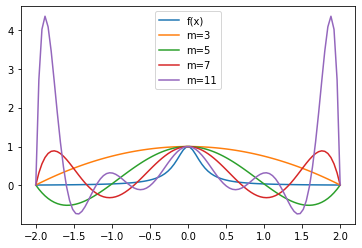

In [5]:
from matplotlib import pyplot as plt
x = np.linspace(-2, 2, 100)
plt.plot(x, runge_func(x), label='f(x)')
plt.legend()
for m in [3, 5, 7, 11]:
    xx = np.linspace(-2, 2, m)
    lagr = LagrangeInterpolator(xx, runge_func(xx))
    plt.plot(x, [lagr(xval) for xval in x], label=f'm={m}')
    plt.legend()

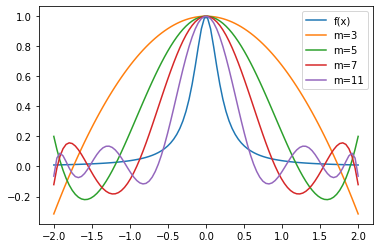

In [6]:
def cb_grid(n):
    x = np.zeros(n)
    for k in range(1, n+1):
        x[k-1] = np.cos((2 * k - 1) / (2 * n) * np.pi) * 2
    return x

x = np.linspace(-2, 2, 100)
plt.plot(x, runge_func(x), label='f(x)')
plt.legend()
for m in [3, 5, 7, 11]:
    xx = cb_grid(m)
    lagr = LagrangeInterpolator(xx, runge_func(xx))
    plt.plot(x, [lagr(xval) for xval in x], label=f'm={m}')
    plt.legend()

Как видно из построенных графиков, качество интерполяции на узлах Чебышева значительно выше, чем на равноменой сетке.